In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [2]:
layer0=Dense(units=1, input_shape=[1])
model = Sequential([layer0])
model.compile(optimizer='sgd', loss='mean_squared_error')

X = np.array([-1., 0., 1., 2., 3., 4.])
y = np.array([-3.,-1.,1., 3., 5., 7.])

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

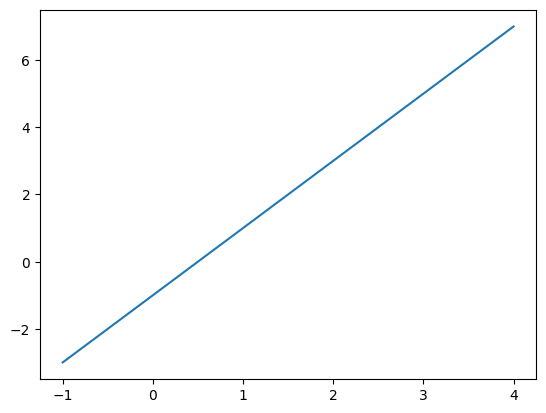

In [4]:
plt.plot(X,y)

In [5]:
model.fit(X,y,epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 852ms/step - loss: 5.1991
Epoch 2/500
1/1 [==============================] - 0s 13ms/step - loss: 4.2668
Epoch 3/500
1/1 [==============================] - 0s 12ms/step - loss: 3.5296
Epoch 4/500
1/1 [==============================] - 0s 11ms/step - loss: 2.9462
Epoch 5/500
1/1 [==============================] - 0s 14ms/step - loss: 2.4836
Epoch 6/500
1/1 [==============================] - 0s 12ms/step - loss: 2.1163
Epoch 7/500
1/1 [==============================] - 0s 11ms/step - loss: 1.8240
Epoch 8/500
1/1 [==============================] - 0s 15ms/step - loss: 1.5908
Epoch 9/500
1/1 [==============================] - 0s 11ms/step - loss: 1.4041
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 1.2540
Epoch 11/500
1/1 [==============================] - 0s 13ms/step - loss: 1.1329
Epoch 12/500
1/1 [==============================] - 0s 10ms/step - loss: 1.0347
Epoch 13/500
1/1 [==============================]

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [7]:
print(model.predict([0.5]))

1/1 [==============================] - 0s 471ms/step
[[0.0059306]]


In [8]:
print(model.predict([0]))

1/1 [==============================] - 0s 80ms/step
[[-0.9929291]]


In [9]:
print(model.predict([10]))

1/1 [==============================] - 0s 83ms/step
[[18.984264]]


In [10]:
layer0.get_weights()

[array([[1.9977194]], dtype=float32), array([-0.9929291], dtype=float32)]

In [15]:
print('y = {}x + {}'.format(layer0.get_weights()[0], layer0.get_weights()[1]))

y = [[1.9977194]]x + [-0.9929291]


In [17]:
#convolutional and pooling layers

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [23]:
model = Sequential([
    Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(28,28,1))
])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________


In [74]:
model = Sequential([
    #'Conv2D(strides=2,')
    Conv2D(filters=16, kernel_size=(3,3), padding='SAME', activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 9, 9, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1296)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                12970     
                                                                 
Total params: 13,130
Trainable params: 13,130
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [76]:
print(model.optimizer)
print(model.loss)
print(model.metrics)

sparse_categorical_crossentropy
[]


In [77]:
from tensorflow.keras.preprocessing import image

In [78]:
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [79]:
print(train_images.shape)
print(test_images.shape)
print(len(test_images))

(60000, 28, 28)
(10000, 28, 28)
10000


In [80]:
print(train_images[0])
print(train_labels[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

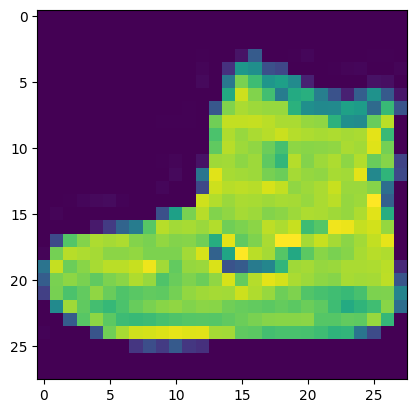

In [81]:
plt.imshow(train_images[0])

In [82]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [83]:
labels=[
    'tshirt',
    'trouser',
    'pullover',
    'dress',
    'coat',
    'sandel',
    'shirt',
    'sneaker',
    'bag',
    'boot',
]

In [84]:
labels[train_labels[0]]

'boot'

In [85]:
history = model.fit(train_images, train_labels, epochs=8, batch_size=256)

Epoch 1/8
235/235 [==============================] - 23s 94ms/step - loss: 3.5236 - accuracy: 0.7430
Epoch 2/8
235/235 [==============================] - 19s 82ms/step - loss: 0.8903 - accuracy: 0.8396
Epoch 3/8
235/235 [==============================] - 19s 80ms/step - loss: 0.6021 - accuracy: 0.8576
Epoch 4/8
235/235 [==============================] - 21s 88ms/step - loss: 0.4638 - accuracy: 0.8706
Epoch 5/8
235/235 [==============================] - 19s 82ms/step - loss: 0.3936 - accuracy: 0.8790
Epoch 6/8
235/235 [==============================] - 19s 81ms/step - loss: 0.3452 - accuracy: 0.8862
Epoch 7/8
235/235 [==============================] - 21s 91ms/step - loss: 0.3086 - accuracy: 0.8943
Epoch 8/8
235/235 [==============================] - 31s 133ms/step - loss: 0.2901 - accuracy: 0.8978


In [86]:
history.history

{'loss': [3.5235977172851562,
  0.8902544975280762,
  0.6020993590354919,
  0.4637928903102875,
  0.39357760548591614,
  0.34518498182296753,
  0.3086203634738922,
  0.2900698184967041],
 'accuracy': [0.7430333495140076,
  0.8396000266075134,
  0.857616662979126,
  0.8706333041191101,
  0.8789833188056946,
  0.8862000107765198,
  0.8943166732788086,
  0.8977833390235901]}

In [87]:
history

In [88]:
import pandas as pd
df = pd.DataFrame(history.history)
df

,loss,accuracy
0,3.523598,0.743033
1,0.890254,0.839600
2,0.602099,0.857617
3,0.463793,0.870633
4,0.393578,0.878983
5,0.345185,0.886200
6,0.308620,0.894317
7,0.290070,0.897783


[Text(0.5, 0, 'epochs'), Text(0, 0.5, 'loss')]

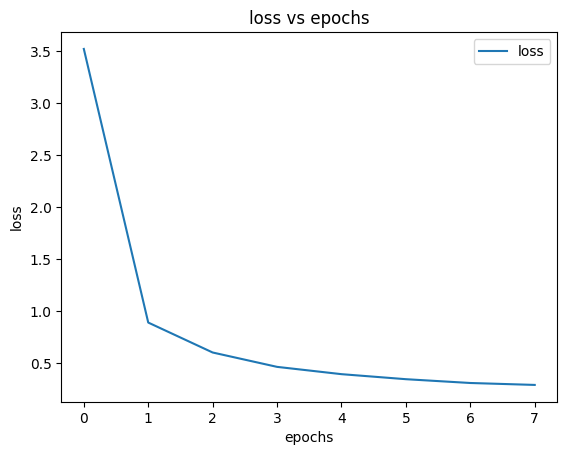

In [89]:
loss_plot = df.plot(y='loss', title='loss vs epochs')
loss_plot.set(xlabel='epochs', ylabel='loss')

## Evaluate and predict

In [90]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 10ms/step - loss: 0.3896 - accuracy: 0.8737


[0.38959500193595886, 0.8737000226974487]

In [91]:
random_inx = np.random.choice(test_images.shape[0])
print(random_inx)

3153


In [93]:
pred = model.predict(test_images[0][np.newaxis,...,np.newaxis])
print(pred)

1/1 [==============================] - 0s 78ms/step
[[3.1011368e-08 3.0538174e-14 2.0994552e-08 1.0766423e-10 5.7265515e-07
  5.8331247e-05 4.0488109e-07 2.6031194e-04 2.3678864e-05 9.9965656e-01]]


### Validation

In [96]:
from sklearn.datasets import load_diabetes
diabetes_dataset = load_diabetes()
print(diabetes_dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [97]:
print(diabetes_dataset.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [99]:
data = diabetes_dataset['data']
data [0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613])

In [100]:
targets = diabetes_dataset['target']
targets

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [101]:
targets = (targets - targets.mean(axis=0)) / targets.std()
targets

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size = 0.1)

In [108]:
print(len(X_train))
print(len(X_test))
print(X_train.shape)
print(y_test.shape)

397
45
(397, 10)
(45,)


In [133]:
def get_model():
  model = Sequential([
      Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
      Dense(128, activation='relu'),
      Dense(128, activation='relu'),
      Dense(128, activation='relu'),
      Dense(128, activation='relu'),
      Dense(1)
  ])
  return model

In [134]:
model= get_model()

In [135]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               1408      
                                                                 
 dense_15 (Dense)            (None, 128)               16512     
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dense_17 (Dense)            (None, 128)               16512     
                                                                 
 dense_18 (Dense)            (None, 128)               16512     
                                                                 
 dense_19 (Dense)            (None, 1)                 129       
                                                                 
Total params: 67,585
Trainable params: 67,585
Non-trai

In [136]:
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

In [137]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.15,
                    batch_size=64, verbose=False)

In [138]:
history.history

{'loss': [0.8630809187889099,
  0.8261537551879883,
  0.7461370825767517,
  0.6706458926200867,
  0.6020967960357666,
  0.5623400211334229,
  0.6013245582580566,
  0.5818013548851013,
  0.5632115006446838,
  0.5402646660804749,
  0.545329749584198,
  0.5309494137763977,
  0.5236772298812866,
  0.5307178497314453,
  0.5170819163322449,
  0.5175740718841553,
  0.5119694471359253,
  0.5023772716522217,
  0.5244104266166687,
  0.5192987322807312,
  0.5099167823791504,
  0.4958566725254059,
  0.49329379200935364,
  0.48431211709976196,
  0.48152750730514526,
  0.4948926568031311,
  0.5011482238769531,
  0.4838428497314453,
  0.49235185980796814,
  0.4721774756908417,
  0.46223539113998413,
  0.4541664123535156,
  0.4669288992881775,
  0.48043131828308105,
  0.45260560512542725,
  0.4471909701824188,
  0.44174933433532715,
  0.4410414397716522,
  0.4729447662830353,
  0.4438447654247284,
  0.43683916330337524,
  0.4403960406780243,
  0.4289829730987549,
  0.4276989698410034,
  0.423028737306

In [139]:
df = pd.DataFrame(history.history)
df

,loss,mae,val_loss,val_mae
0,0.863081,0.863081,0.738440,0.738440
1,0.826154,0.826154,0.672692,0.672692
2,0.746137,0.746137,0.575291,0.575291
3,0.670646,0.670646,0.575742,0.575742
4,0.602097,0.602097,0.518652,0.518652
...,...,...,...,...
95,0.325441,0.325441,0.734222,0.734222
96,0.316073,0.316073,0.659386,0.659386
97,0.287736,0.287736,0.663197,0.663197
98,0.277000,0.277000,0.651348,0.651348


In [140]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.6826 - mae: 0.6826


[0.6825623512268066, 0.6825623512268066]

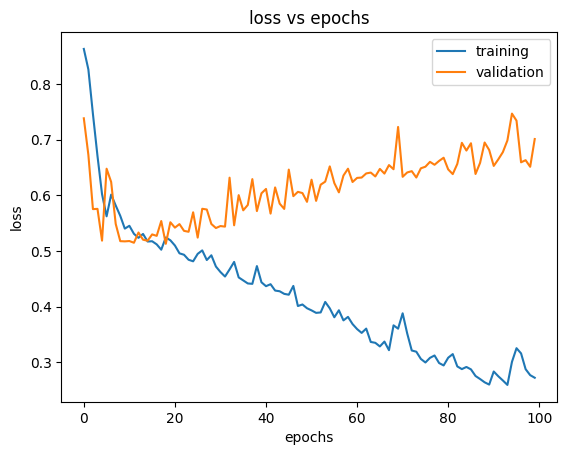

In [143]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [153]:
from tensorflow.keras import regularizers
def get_regularized_model(wd, rate):
  model = Sequential([
      Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu', input_shape=(X_train.shape[1],)),
      Dense(128, kernel_regularizer=regularizers.l2(wd),activation='relu'),
      Dense(128, kernel_regularizer=regularizers.l2(wd),activation='relu'),
      Dense(128, kernel_regularizer=regularizers.l2(wd),activation='relu'),
      Dense(128, kernel_regularizer=regularizers.l2(wd),activation='relu'),
      Dense(1)
  ])
  return model

In [157]:
model = get_regularized_model(1e-5,0.3)

In [159]:
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

In [160]:
history = model.fit(X_train, y_train, epochs=100, batch_size=264, validation_split=0.15)

Epoch 1/100
2/2 [==============================] - 2s 223ms/step - loss: 0.8742 - mae: 0.8689 - val_loss: 0.7656 - val_mae: 0.7603
Epoch 2/100
2/2 [==============================] - 0s 63ms/step - loss: 0.8658 - mae: 0.8606 - val_loss: 0.7489 - val_mae: 0.7436
Epoch 3/100
2/2 [==============================] - 0s 41ms/step - loss: 0.8534 - mae: 0.8482 - val_loss: 0.7265 - val_mae: 0.7213
Epoch 4/100
2/2 [==============================] - 0s 55ms/step - loss: 0.8355 - mae: 0.8303 - val_loss: 0.6987 - val_mae: 0.6935
Epoch 5/100
2/2 [==============================] - 0s 42ms/step - loss: 0.8113 - mae: 0.8061 - val_loss: 0.6636 - val_mae: 0.6584
Epoch 6/100
2/2 [==============================] - 0s 58ms/step - loss: 0.7816 - mae: 0.7764 - val_loss: 0.6255 - val_mae: 0.6203
Epoch 7/100
2/2 [==============================] - 0s 42ms/step - loss: 0.7426 - mae: 0.7374 - val_loss: 0.5848 - val_mae: 0.5796
Epoch 8/100
2/2 [==============================] - 0s 44ms/step - loss: 0.6985 - mae: 0.6

In [161]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 13ms/step - loss: 0.7023 - mae: 0.6978


[0.7022977471351624, 0.6978210210800171]